In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

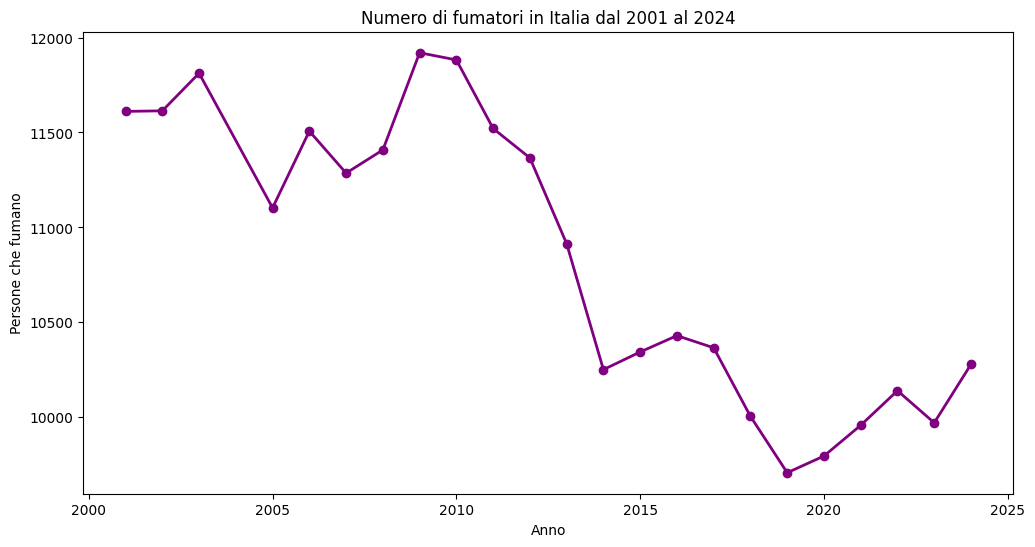

In [97]:
df = pd.read_csv('dati\\Abitudine al fumo.csv')
plt.figure(figsize=(12, 6))
df.sort_values(by="TIME_PERIOD", inplace=True)

fumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: fumatori") &
              (df["MEASURE"] == "THV")]

plt.plot(
    fumatori["TIME_PERIOD"],
    fumatori["Osservazione"],
    marker="o",
    color="purple",
    linewidth=2.0
)

plt.xlabel("Anno")
plt.ylabel("Persone che fumano")
plt.title("Numero di fumatori in Italia dal 2001 al 2024")
plt.show()



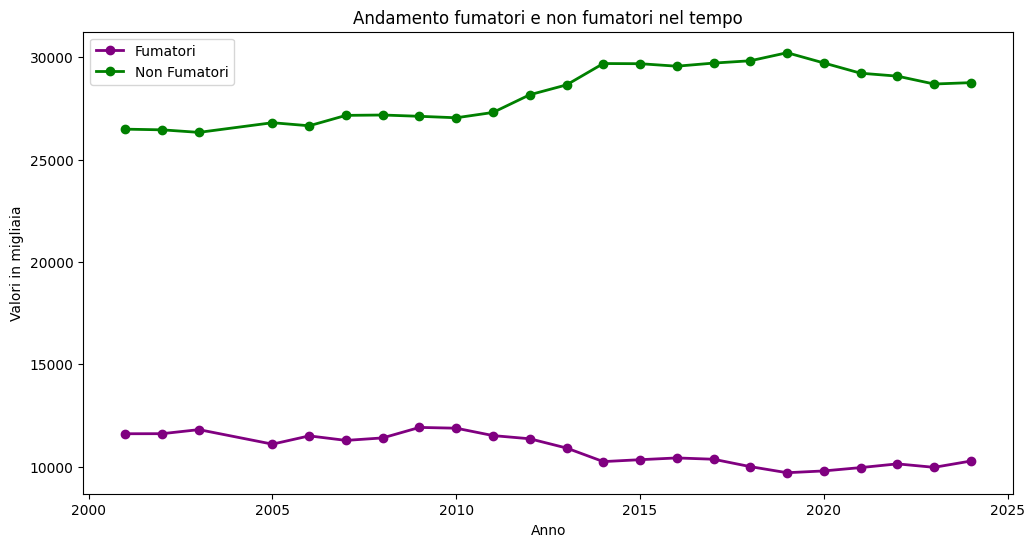

In [102]:
df = pd.read_csv('dati\\Abitudine al fumo.csv')
plt.figure(figsize=(12, 6))
df.sort_values(by="TIME_PERIOD")

fumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: fumatori") &
              (df["MEASURE"] == "THV")]
nonFumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: non fumatori") &
              (df["MEASURE"] == "THV")]

plt.plot(
    fumatori["TIME_PERIOD"],
    fumatori["Osservazione"],
    marker="o",
    color="purple",
    linewidth=2.0
)
plt.plot(
    nonFumatori["TIME_PERIOD"],
    nonFumatori["Osservazione"],
    marker="o",
    color="green",
    linewidth=2.0
)

plt.xlabel("Anno")
plt.ylabel("Valori in migliaia")
plt.title("Andamento fumatori e non fumatori nel tempo")
plt.legend(["Fumatori", "Non Fumatori"])
plt.show()

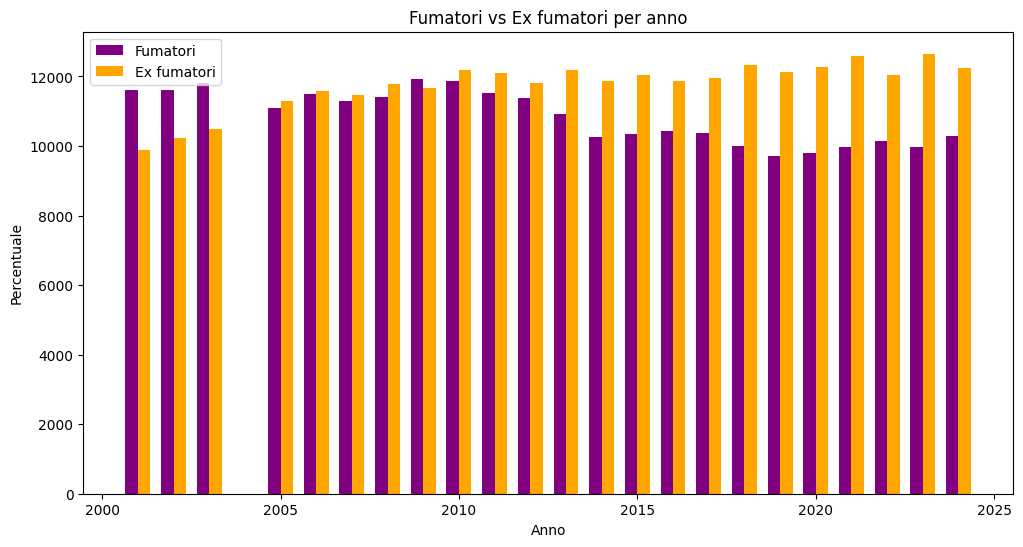

In [103]:
df = pd.read_csv('dati\\Abitudine al fumo.csv')
plt.figure(figsize=(12, 6))
df.sort_values(by="TIME_PERIOD")

fumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: fumatori") &
              (df["MEASURE"] == "THV")]
nonFumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: non fumatori") &
              (df["MEASURE"] == "THV")]
exFumatori = df[(df["Indicatore"] == "Persone di 14 anni e più per abitudine al fumo: ex fumatori") &
              (df["MEASURE"] == "THV")]

anni = fumatori["TIME_PERIOD"]
width = 0.35  # larghezza delle barre

plt.bar(anni - width/2, fumatori["Osservazione"], width=width, label="Fumatori", color='purple')
#plt.bar(anni + width/2, nonFumatori["Osservazione"], width=width, label="Non fumatori", color='green')
plt.bar(anni + width/2, exFumatori["Osservazione"], width=width, label="Ex fumatori", color='orange')

plt.xlabel("Anno")
plt.ylabel("Percentuale")
plt.title("Fumatori vs Ex fumatori per anno")
plt.legend()
plt.show()

Text(0.5, 1.0, "I fumatori in Italia per fascia d'età (2023)")

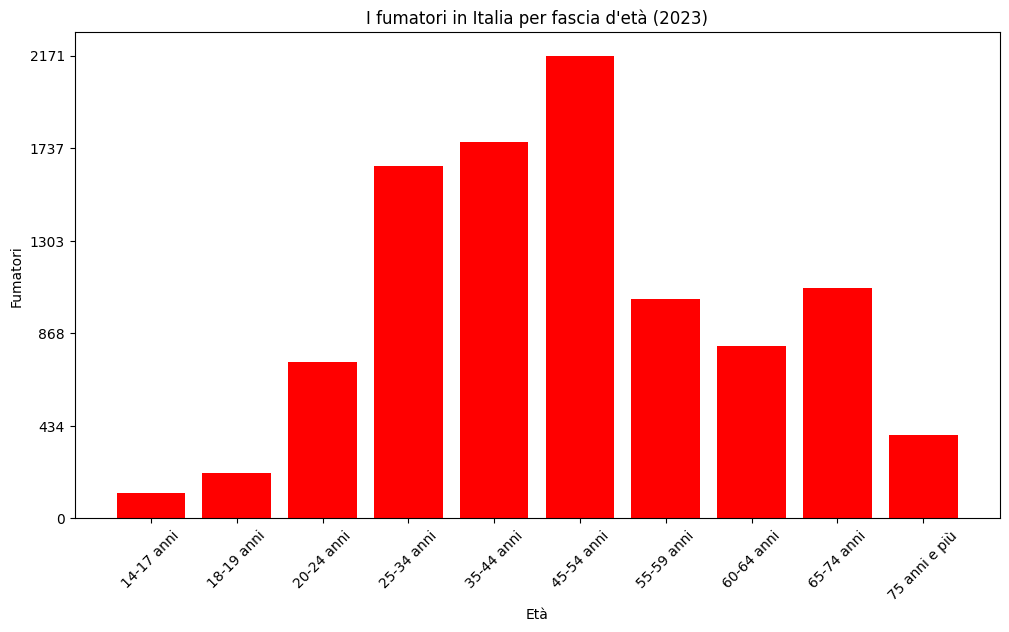

In [104]:
df = pd.read_csv('dati\\Abitudine al fumo - età dettaglio.csv')
df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["Sesso"] == "Totale") &
                 (df["MEASURE"] == 'THV') &
                 (df["DATA_TYPE"] == '14_FUMO_SI')& 
                 (df["AGE"] != 'Y_GE14')]

plt.figure(figsize=(10, 6))
df_filtered["Osservazione"] = pd.to_numeric(df_filtered["Osservazione"], errors='coerce')
df_filtered.dropna(subset=["Osservazione"], inplace=True)
anno = df_filtered["Età"]
value = df_filtered["Osservazione"]
plt.bar(anno, value, color='red')
ax = plt.gca()
max_value = df_filtered["Osservazione"].max()
ticks = np.linspace(0, max_value, 6)
ax.set_yticks(ticks)
plt.xticks(rotation=45)  # ruota le etichette di 45°
plt.tight_layout() # aggiusta il layout per evitare sovrapposizioni
plt.xlabel("Età")
plt.ylabel("Fumatori")
plt.title("I fumatori in Italia per fascia d'età (2023)")

Text(0.5, 1.0, "Confronto fumatori uomini vs donne in Italia per fascia d'età (2023)")

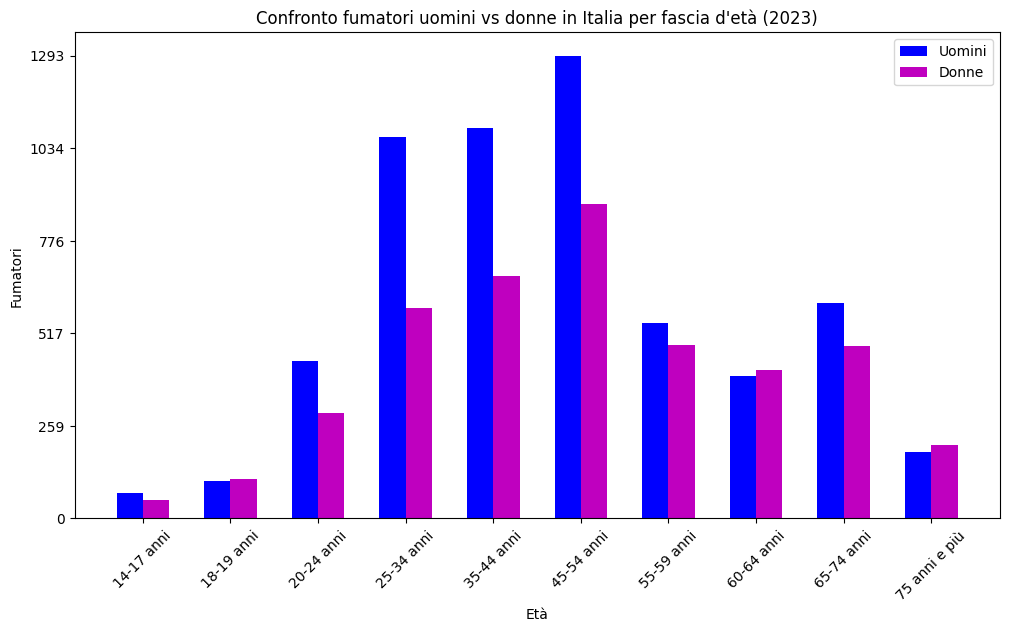

In [93]:
#lettura del file
df = pd.read_csv('dati\\Abitudine al fumo - età dettaglio.csv')

#filtraggio dei dati - solo 2023, misura per migliaia, solo fumatori, escluso conteggio totale
df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["MEASURE"] == 'THV') &
                 (df["DATA_TYPE"] == '14_FUMO_SI')& 
                 (df["AGE"] != 'Y_GE14')]

#conversione in numerico e rimozione NaN
df_filtered["Osservazione"] = pd.to_numeric(df_filtered["Osservazione"], errors='coerce')
df_filtered.dropna(subset=["Osservazione"], inplace=True)

#separazione per sesso
uomini = df_filtered[df_filtered["Sesso"] == "Maschi"]
donne = df_filtered[df_filtered["Sesso"] == "Femmine"]

# Creazione del grafico a barre affiancate
plt.figure(figsize=(10, 6))

#estrazione dei valori
width = 0.3  # larghezza delle barre
#numero di fasce d'età
x = np.arange(len(uomini))
#creazione delle due barre, messe affiancate
plt.bar(x - width/2, uomini["Osservazione"], width=width, label="Uomini", color='blue')
plt.bar(x + width/2, donne["Osservazione"], width=width, label="Donne", color='m')
#rotazione etichette asse x
plt.xticks(x, uomini["Età"], rotation=45)
#estrazione degli assi
ax = plt.gca()
#prendi valore massimo per y
max_value = uomini["Osservazione"].max()

#scrivi su asse y solo alcuni valori, equidistanti tra loro
ticks = np.linspace(0, max_value, 6)
ax.set_yticks(ticks)
plt.xticks(rotation=45)  # ruota le etichette di 45°
plt.tight_layout() # aggiusta il layout per evitare sovrapposizioni
plt.legend()
plt.xlabel("Età")
plt.ylabel("Fumatori")
plt.title("Confronto fumatori uomini vs donne in Italia per fascia d'età (2023)")

Text(0.5, 1.0, "Gli ex-fumatori in Italia per fascia d'età (2023)")

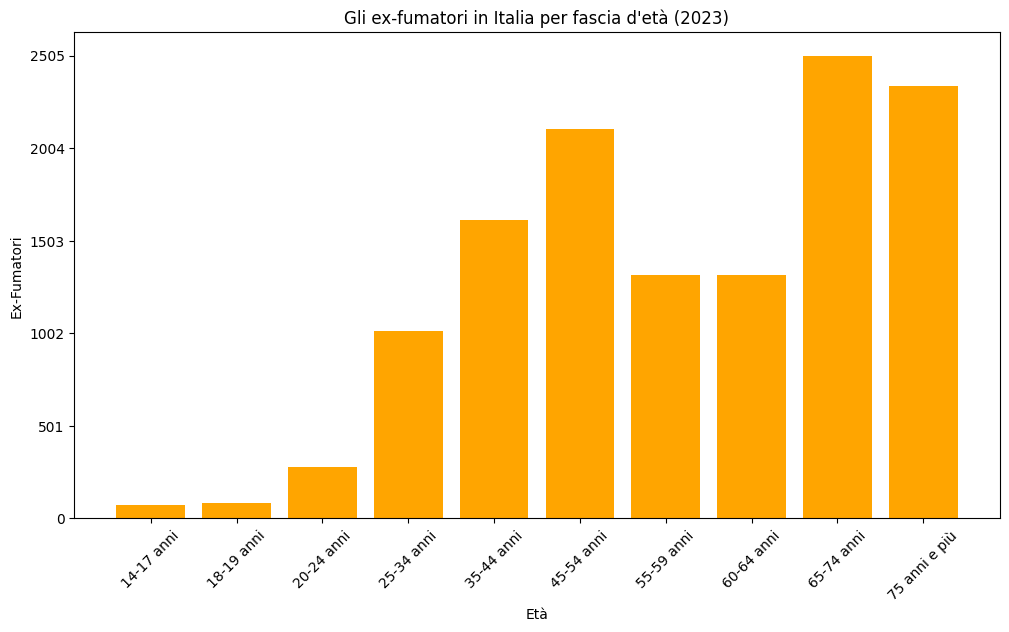

In [105]:
df = pd.read_csv('dati\\Abitudine al fumo - età dettaglio.csv')
df_filtered = df[(df["TIME_PERIOD"] == 2023) &
                 (df["Sesso"] == "Totale") &
                 (df["MEASURE"] == 'THV') &
                 (df["DATA_TYPE"] == '14_FUMO_EX')& 
                 (df["AGE"] != 'Y_GE14')]

plt.figure(figsize=(10, 6))
df_filtered["Osservazione"] = pd.to_numeric(df_filtered["Osservazione"], errors='coerce')
df_filtered.dropna(subset=["Osservazione"], inplace=True)
anno = df_filtered["Età"]
value = df_filtered["Osservazione"]
plt.bar(anno, value, color='orange')
ax = plt.gca()
max_value = df_filtered["Osservazione"].max()
ticks = np.linspace(0, max_value, 6)
ax.set_yticks(ticks)
plt.xticks(rotation=45)  # ruota le etichette di 45°
plt.tight_layout() # aggiusta il layout per evitare sovrapposizioni
plt.xlabel("Età")
plt.ylabel("Ex-Fumatori")
plt.title("Gli ex-fumatori in Italia per fascia d'età (2023)")

Text(0.5, 1.0, 'Prevalenza di fumatori per paese (2023)')

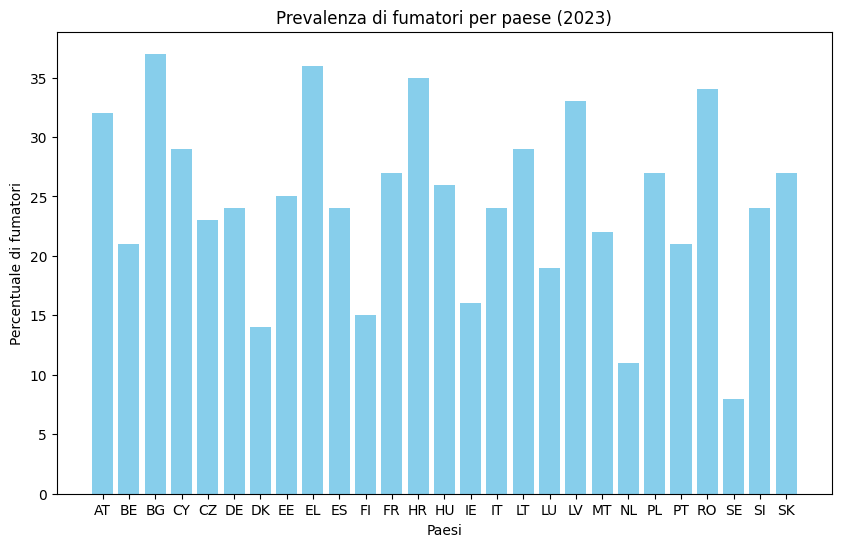

In [94]:
# Load data from CSV file
df = pd.read_csv('dati\\Smoking prevalence by sex.csv')
df_filtered = df[(df["TIME_PERIOD"] == 2023) & (df["Sex"] == "Total") & (df["geo"] != "EU27_2020")& (df["geo"] != "EU")]
df_filtered = df_filtered.dropna(subset=["OBS_VALUE"])
#x = np.arange(len(geo)) * 1 # Spacing for bars

plt.figure(figsize=(10, 6))
plt.bar(df_filtered["geo"], df_filtered["OBS_VALUE"], color='skyblue')
#plt.xticks(x, df_filtered["geo"])
plt.xlabel("Paesi")
plt.ylabel("Percentuale di fumatori")
plt.title("Prevalenza di fumatori per paese (2023)")